EVALUATION TECHNIQUES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING DATASET

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


In [6]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [7]:
print(X)     

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# LOGISTIC REGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [12]:
reg=LogisticRegression()

In [13]:
reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
reg.score(X_train,y_train)

0.789875

In [15]:
#Create a predication set:
predications=reg.predict(X_test)

Test the accuracy of logistic regression 

In [16]:
#print confusion matrix
df_confusion_matrix=pd.DataFrame(metrics.confusion_matrix(y_test,predications),index=['Churn','Not Churn'],columns=['Churn','Not Churn'])
df_confusion_matrix

,Churn,Not Churn
Churn,1553,42
Not Churn,380,25


In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predications))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [18]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predications))

0.789


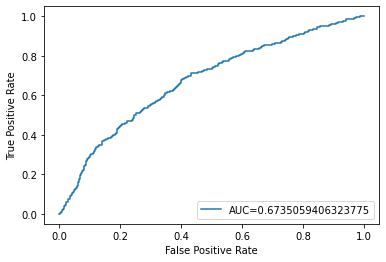

In [19]:
y_pred_proba=reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Train a Naive Bayes Classifier 

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)

MultinomialNB()

In [21]:
predications=nb_model.predict(X_test)


In [22]:
nb_model.score(X_train,y_train)

0.551875

Test the accuracy of naive bayes model

In [23]:

df_confusion_matrix=pd.DataFrame(metrics.confusion_matrix(y_test,predications),index=['Churn','Not Churn'],columns=['Churn','Not Churn'])
df_confusion_matrix

,Churn,Not Churn
Churn,865,730
Not Churn,182,223


In [24]:
print(metrics.classification_report(y_test,predications))

              precision    recall  f1-score   support

           0       0.83      0.54      0.65      1595
           1       0.23      0.55      0.33       405

    accuracy                           0.54      2000
   macro avg       0.53      0.55      0.49      2000
weighted avg       0.71      0.54      0.59      2000



In [25]:
print(metrics.accuracy_score(y_test,predications))

0.544


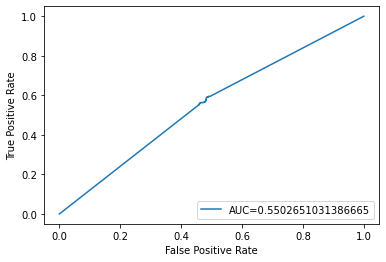

In [26]:
y_pred_proba=nb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [27]:
print("Thank you")

Thank you
